# Training YOLOv5 und YOLOv4

#### Installation von YOLOv5 mit Git und pip

In [ ]:
!git clone "https://github.com/ultralytics/yolov5.git"
%cd yolov5
%pip install -qr requirements.txt
%cd ..

#### Imports

In [29]:
# Import
import torch
import wandb
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [30]:
# Funktion zum Plotten von Bildern mit besserer Auflösung
def plot_high_resolution_png(image_path, dpi=300):

    img = mpimg.imread(image_path)

    # Bild plotten mit hoher Auflösung (angepasst an die DPI)
    plt.figure(dpi=dpi)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Training von YOLOv5 mit WandB-Integration
Wandb wurde während des Trainingsprozesses genutzt, um eine effektive Erfassung und Verfolgung der Metriken zu gewährleisten.  
Um das Training mit GPU-Unterstützung zu ermöglichen wurden folgende Paketversionen installiert:
- PyTorch: 1.9.0
- CUDA Toolkit: 11.1
- Torch: 1.9.0
- Torchvision: 0.10.0+cu111

In [31]:
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.9.0 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3080', major=8, minor=6, total_memory=10239MB, multi_processor_count=68)


In [ ]:
wandb.login()

In [ ]:
%cd yolov5

#### Training von All_Classes
Der "Face Mask Detection Dataset" im Ordner Dataset enthält 20 Klassen. Im Training von All_Classes wird einmal mit diesen 20 Klassen Trainiert und später wird noch ein Modell trainiert, dass nur 4 Klassen (selber Datensatz) hat. Danach werden diese beide Modelle für All_Classes und Face_Classes verglichen und das bessere Modell für YOLOv5 festgestellt. 


Hier sind alle 20 Klassen: ['face_no_mask', 'face_with_mask', 'mask_surgical', 'hat', 'eyeglasses', 'face_other_covering', 'face_with_mask_incorrect', 'mask_colorful', 'helmet', 'sunglasses', 'scarf_bandana', 'hair_net', 'goggles', 'face_shield', 'hijab_niqab', 'turban', 'balaclava_ski_mask', 'gas_mask', 'hood', 'other']


In [ ]:
!python train_all.py --data dataset/all_classes/data.yaml --epochs 20 --cfg yolov5s.yaml --weights yolov5s.pt  --batch-size 5 --upload_dataset --bbox_interval 1 --img 640

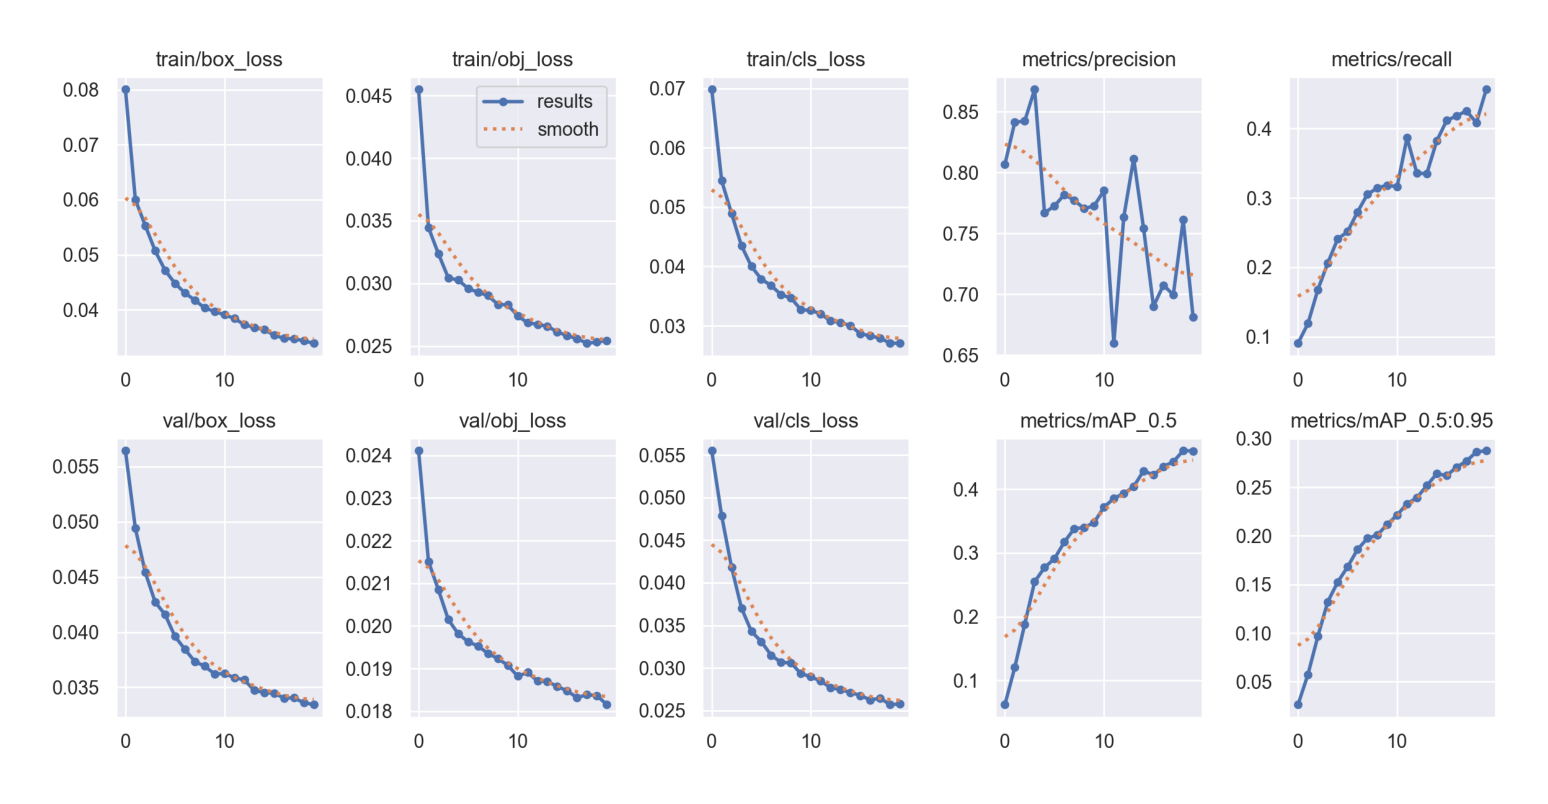

In [32]:
# Ergebnisse der Metriken
image_path = '../results/yolov5/all_results.png'
plot_high_resolution_png(image_path, dpi=300)

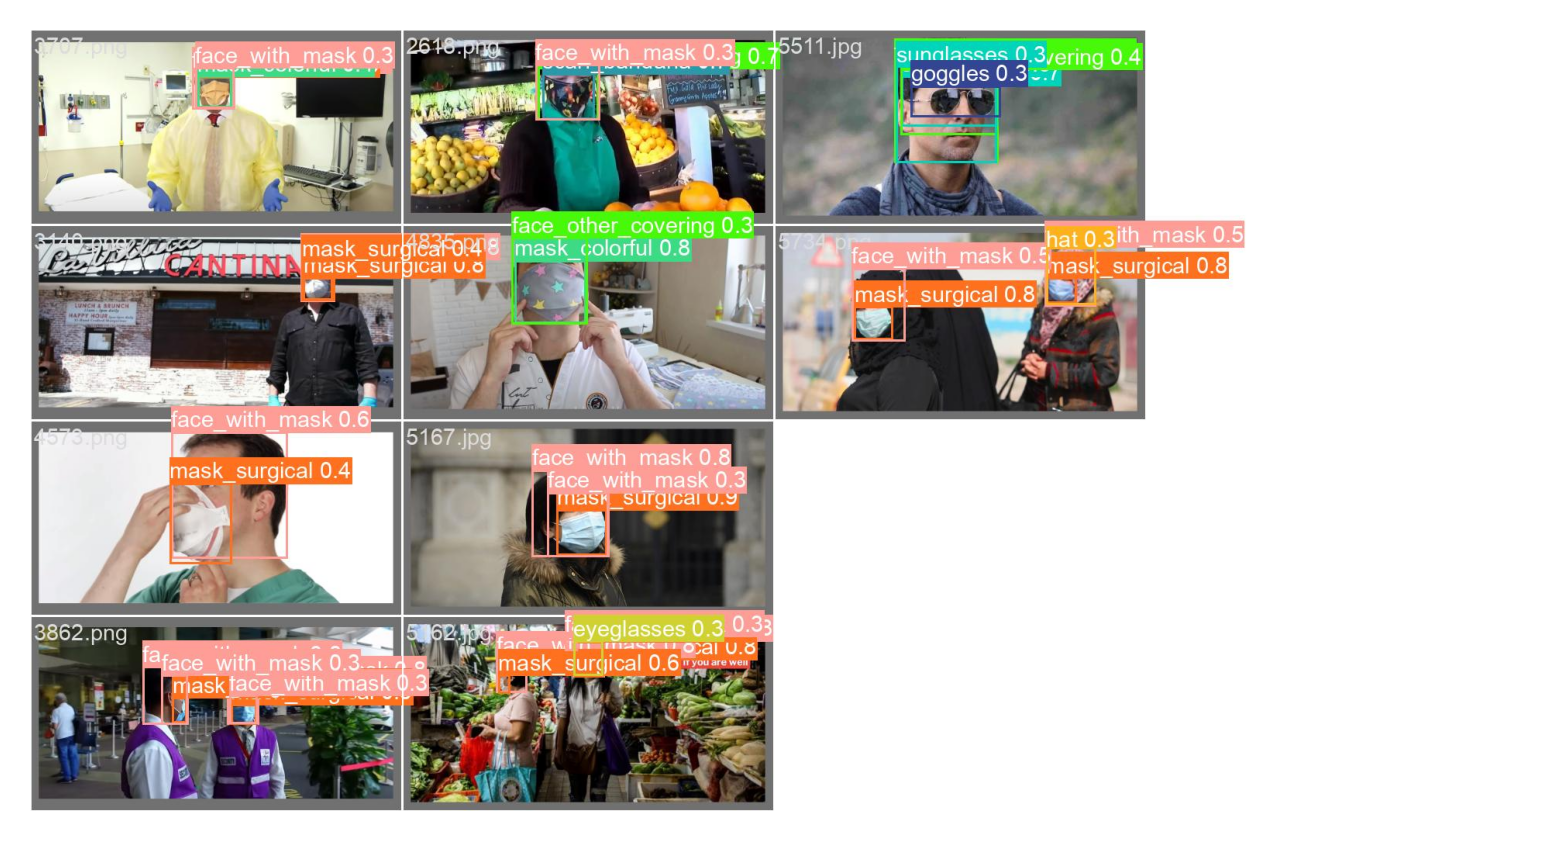

In [33]:
# Ergebnisse der Vorhersagen
image_path = '../results/yolov5/all_val_batch1_pred.jpg'
plot_high_resolution_png(image_path, dpi=300)

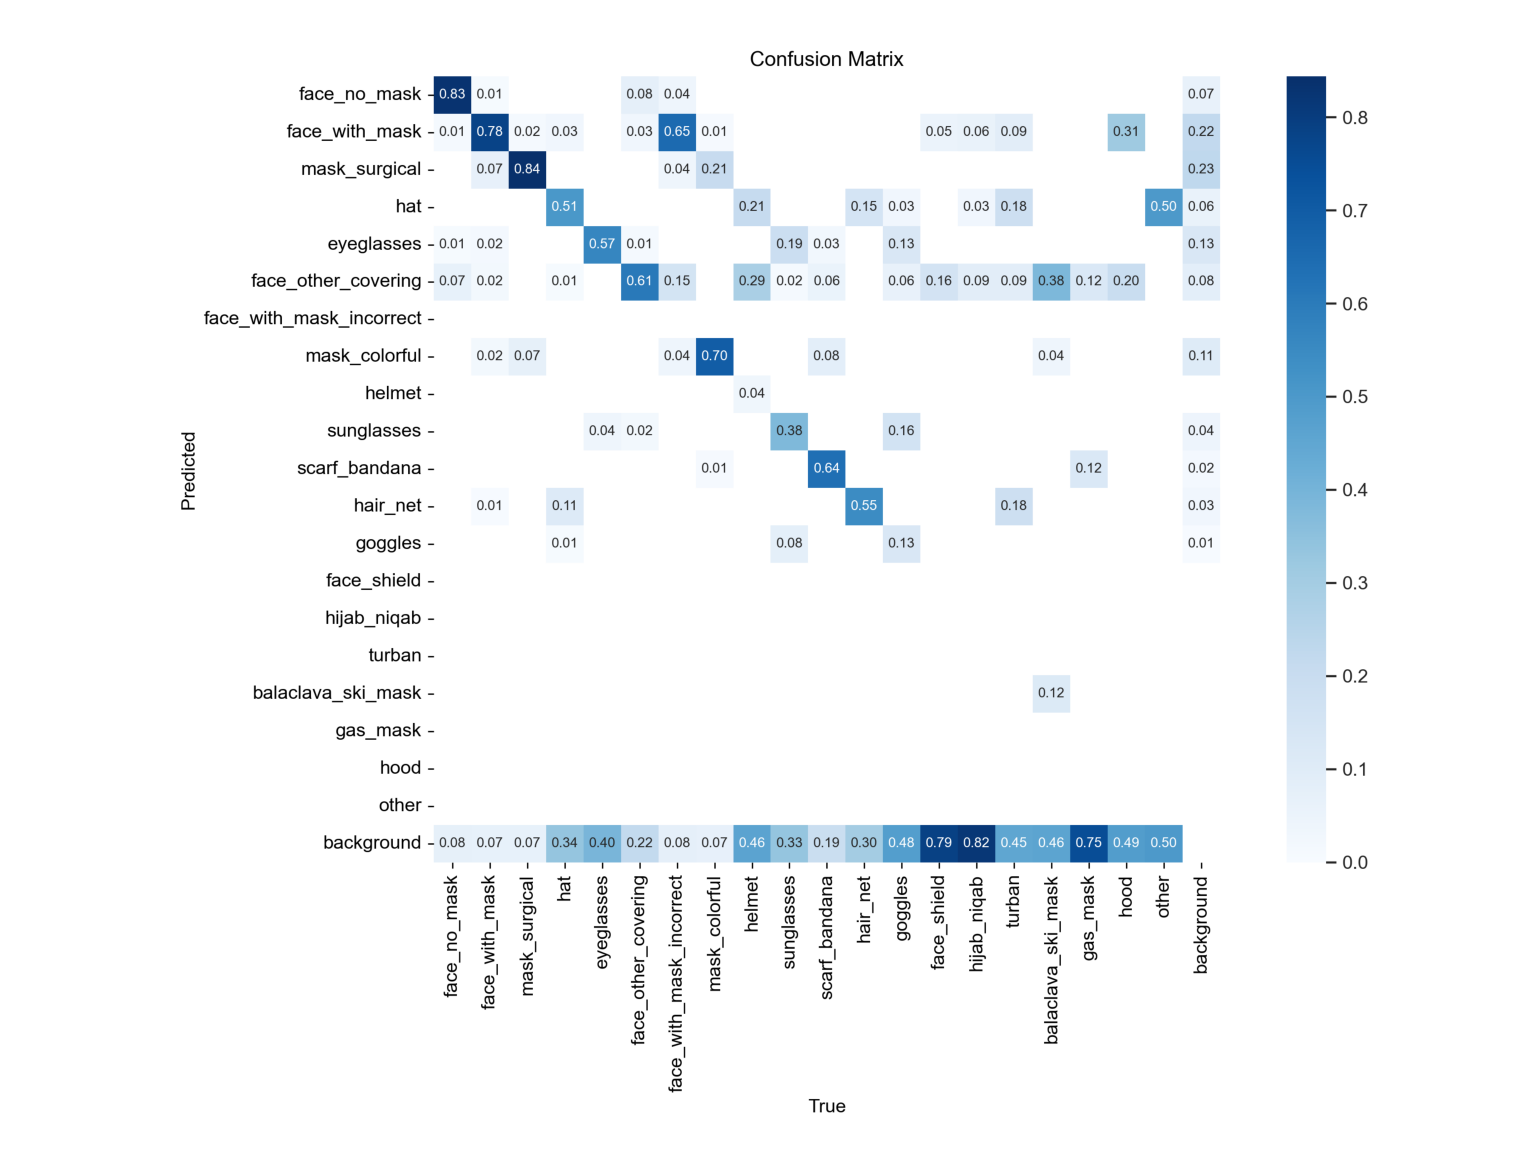

In [34]:
# Konfusionsmatrix
image_path = '../results/yolov5/all_confusion_matrix.png'
plot_high_resolution_png(image_path, dpi=300)

#### Training von Face_Classes
In diesem Training wird der selbe Datensatz wie beim All_Classes Training verwendet. Einziger unterschied ist, dass in diesem Training sich nur auf die Face-Klassen bezieht: ['face_no_mask', 'face_with_mask', 'face_other_covering', 'face_with_mask_incorrect']


In [ ]:
!python train_faces.py --data dataset/face_classes/data.yaml --epochs 20 --cfg yolov5s.yaml --weights yolov5s.pt --batch-size 5 --upload_dataset --bbox_interval 1 --img 640

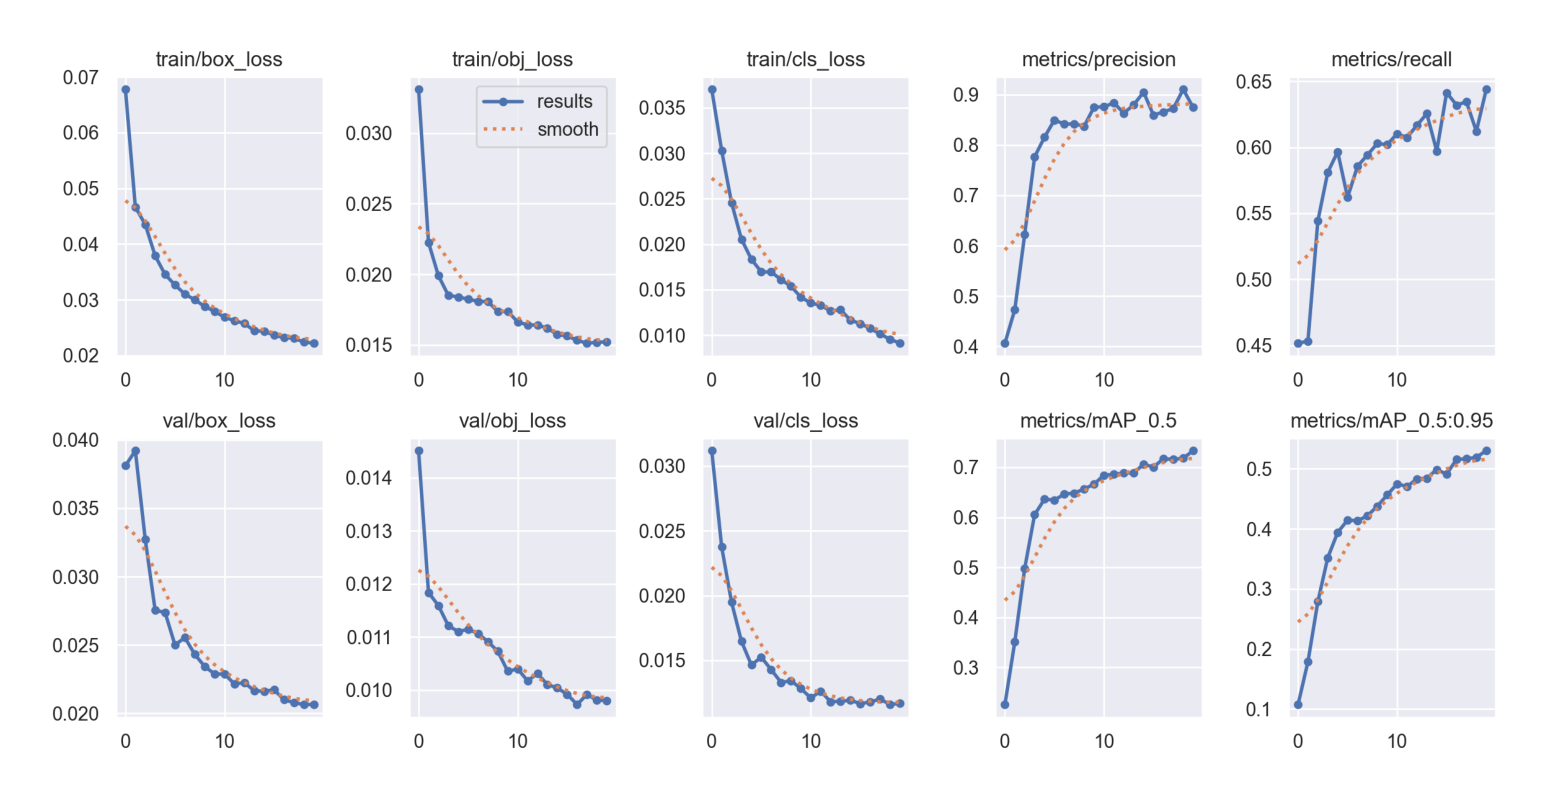

In [35]:
# Ergebnisse der Metriken
image_path = '../results/yolov5/face_results.png'
plot_high_resolution_png(image_path, dpi=300)

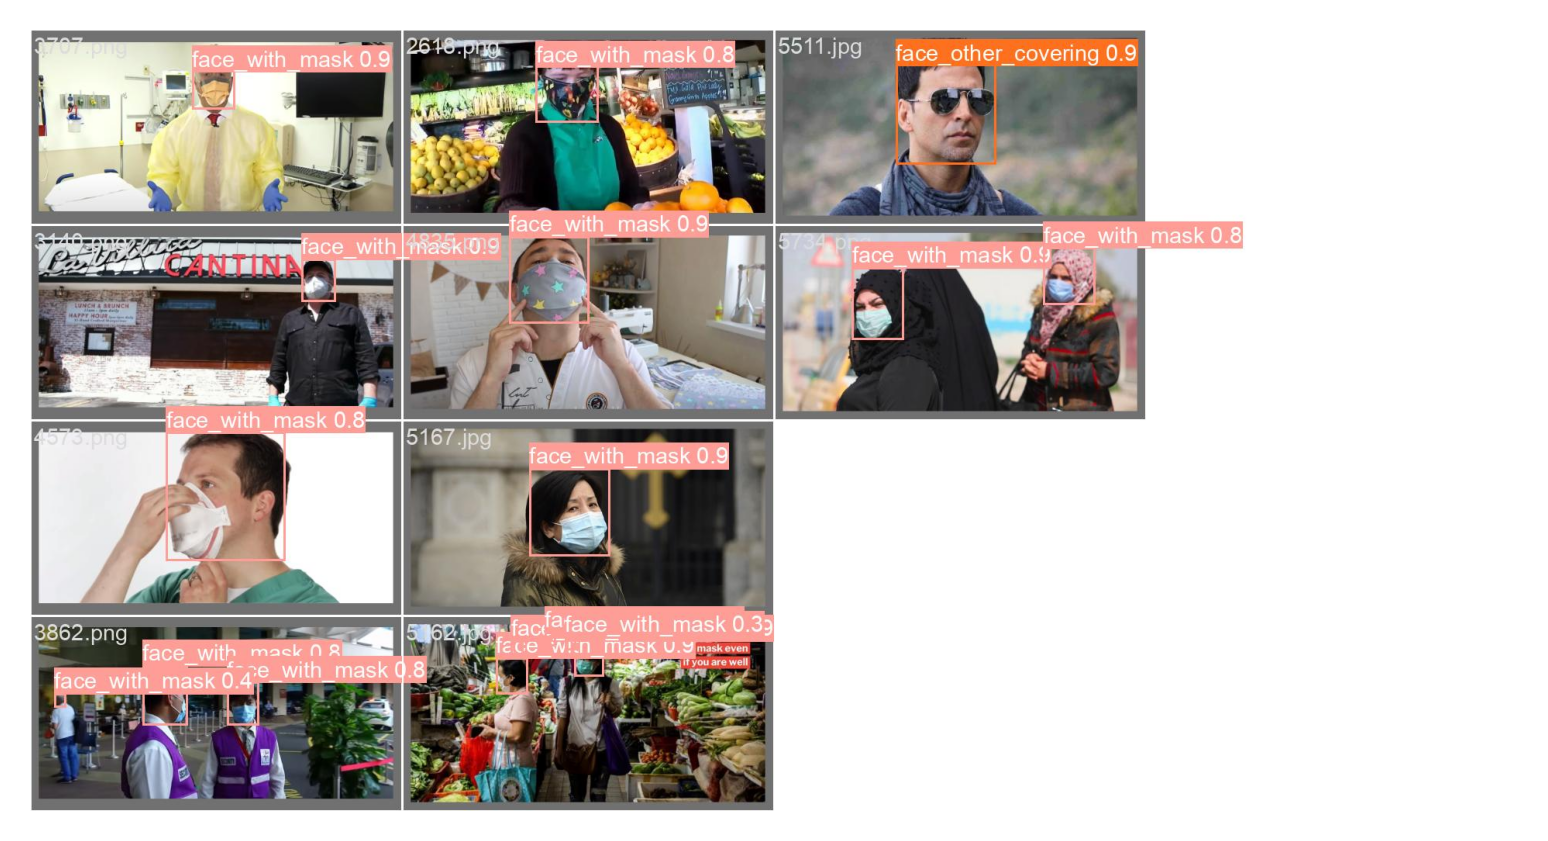

In [36]:
# Ergebnisse der Vorhersagen
image_path = '../results/yolov5/face_val_batch1_pred.jpg'
plot_high_resolution_png(image_path, dpi=300)

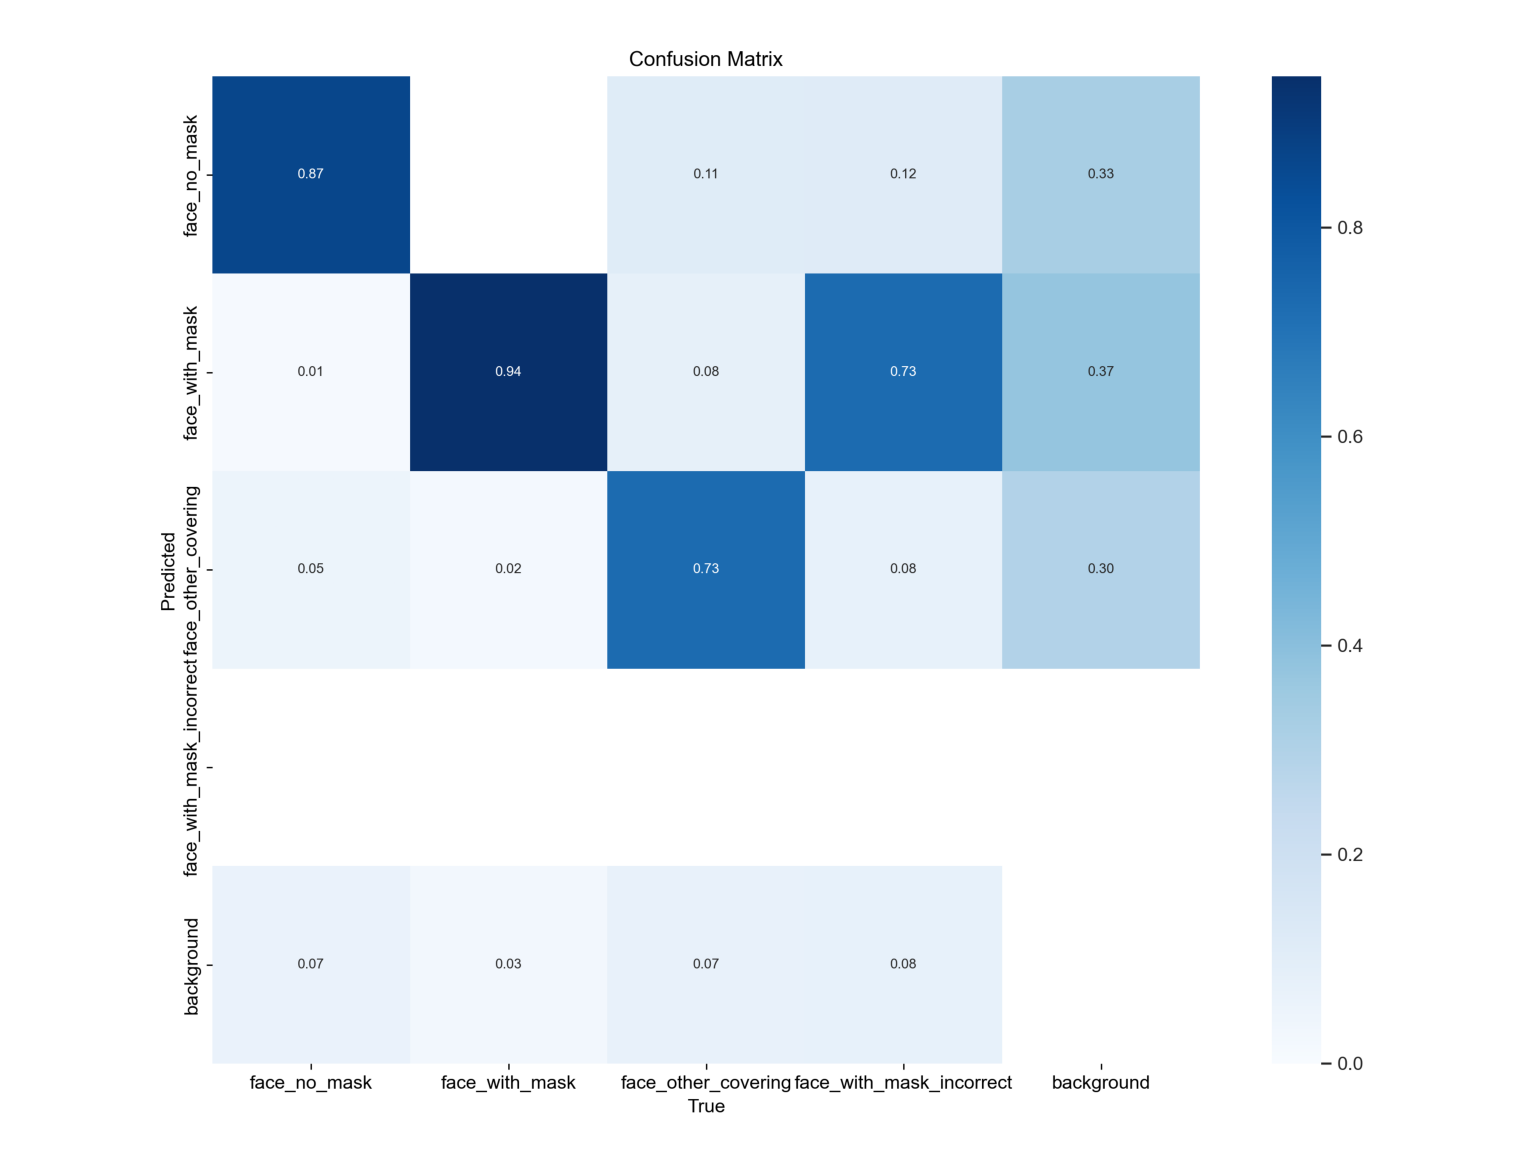

In [37]:
# Konfusionsmatrix
image_path = '../results/yolov5/face_confusion_matrix.png'
plot_high_resolution_png(image_path, dpi=300)

#### Fazit:
Bei den Resultaten beider YOLOv5-Modelle ist deutlich zu erkennen, dass das Modell mit dem Training auf den Face_Klassen bessere Leistung zeigt. Es erzielt höhere Werte bei den Metriken Precision, Recall, mAP_0.5 und mAP_0.5:0.95 im Vergleich zum Modell, das mit den 20 Klassen trainiert wurde.

Die Konfusionsmatrix ermöglicht es uns, die tatsächlichen und vorhergesagten Klassen zu vergleichen. Auch hier wird deutlich, dass das Modell mit den 4 Face_Klassen bessere Ergebnisse liefert als das Modell, das mit den 20 Klassen trainiert wurde. Zusätzlich zeigt sich, dass beim Training mit allen Klassen einige Klassen überhaupt nicht vorhergesagt werden. Dies ist höchstwahrscheinlich darauf zurückzuführen, dass der Datensatz für 20 Klassen zu gering ist, um ein sinnvolles Training zu ermöglichen. Die Wahrscheinlichkeit, dass auch alle Klassen im Trainings- und Validierungsdatensatz vorhanden ist, ist wahrscheinlich auch gering. 
Auch beim Training mit den Face_Classes wird die Klasse "face_with_mask_incorrect" kaum vorhergesagt. Dies könnte wahrscheinlich darauf zurückzuführen sein, dass diese Klasse im Datensatz nicht häufig vertreten war. Dieses Verhalten lässt sich wahrscheinlich darauf zurückführen, dass diese spezifische Klasse nur selten im Datensatz vertreten war. *

#### Training mit Dunklen Datensatz
Da die Evaluierung mit dem Face_Class Modell nicht mit den Annotationen des Dunklen Datensatz kompatibel ist (Face_Classes hat 4 Klassen und Der Dunkle Datensatz 3), wurde beschlossen ein weiteres Modell zu trainieren auf Grundlage des "Kaggle Face Mask Detection Full" Datensatzes von Kaggle. Hierbei wurden die Bilder durch Augmentation verdunkelt.

In [ ]:
!python train_dark.py --data dataset/dark/data.yaml --epochs 50 --cfg yolov5s.yaml --weights yolov5s.pt --batch-size 5 --upload_dataset --bbox_interval 1 --img 640

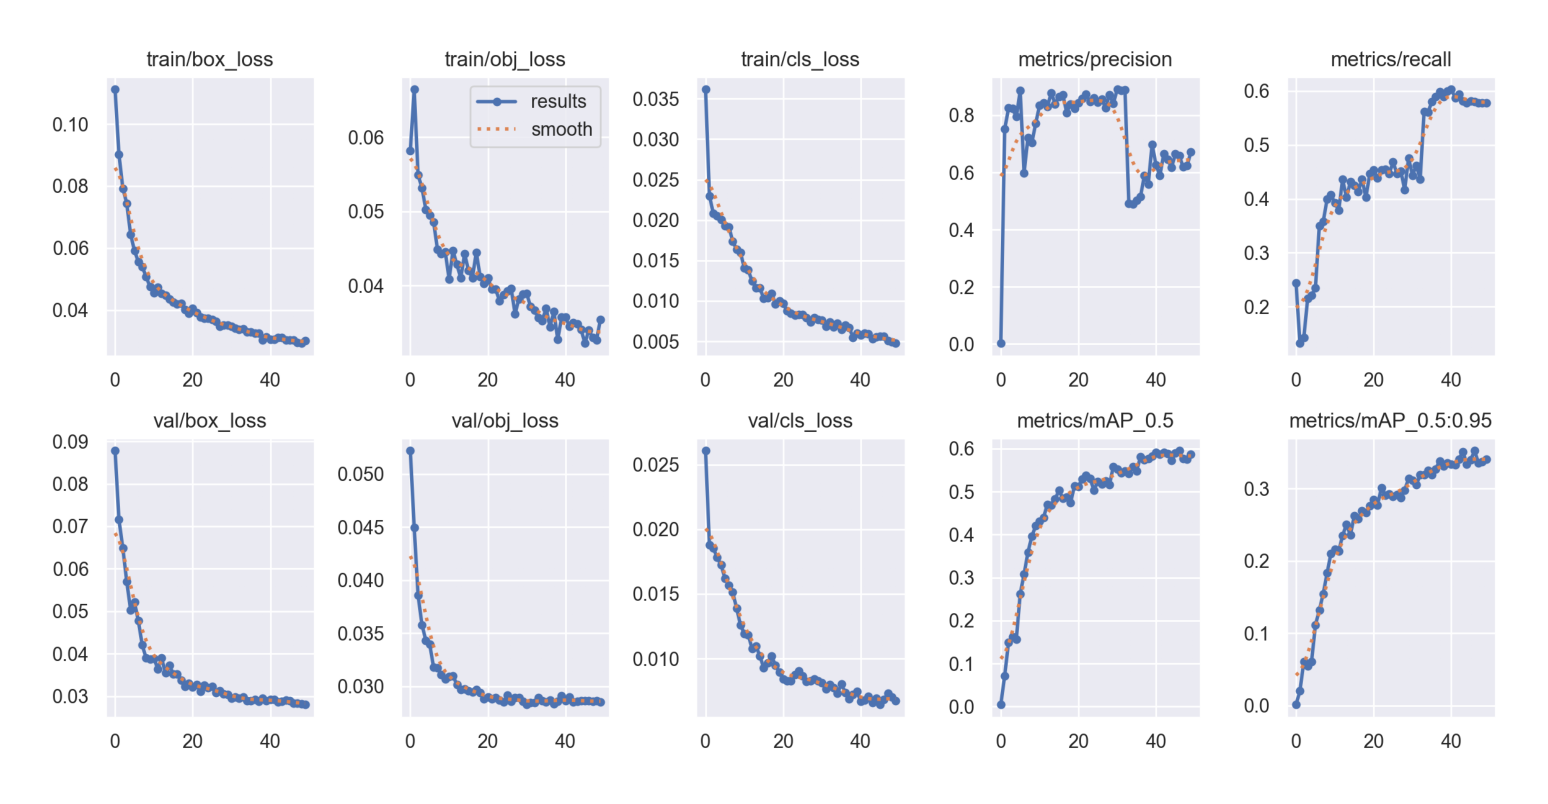

In [41]:
# Ergebnisse der Metriken
image_path = '../results/yolov5/dark_results.png'
plot_high_resolution_png(image_path, dpi=300)

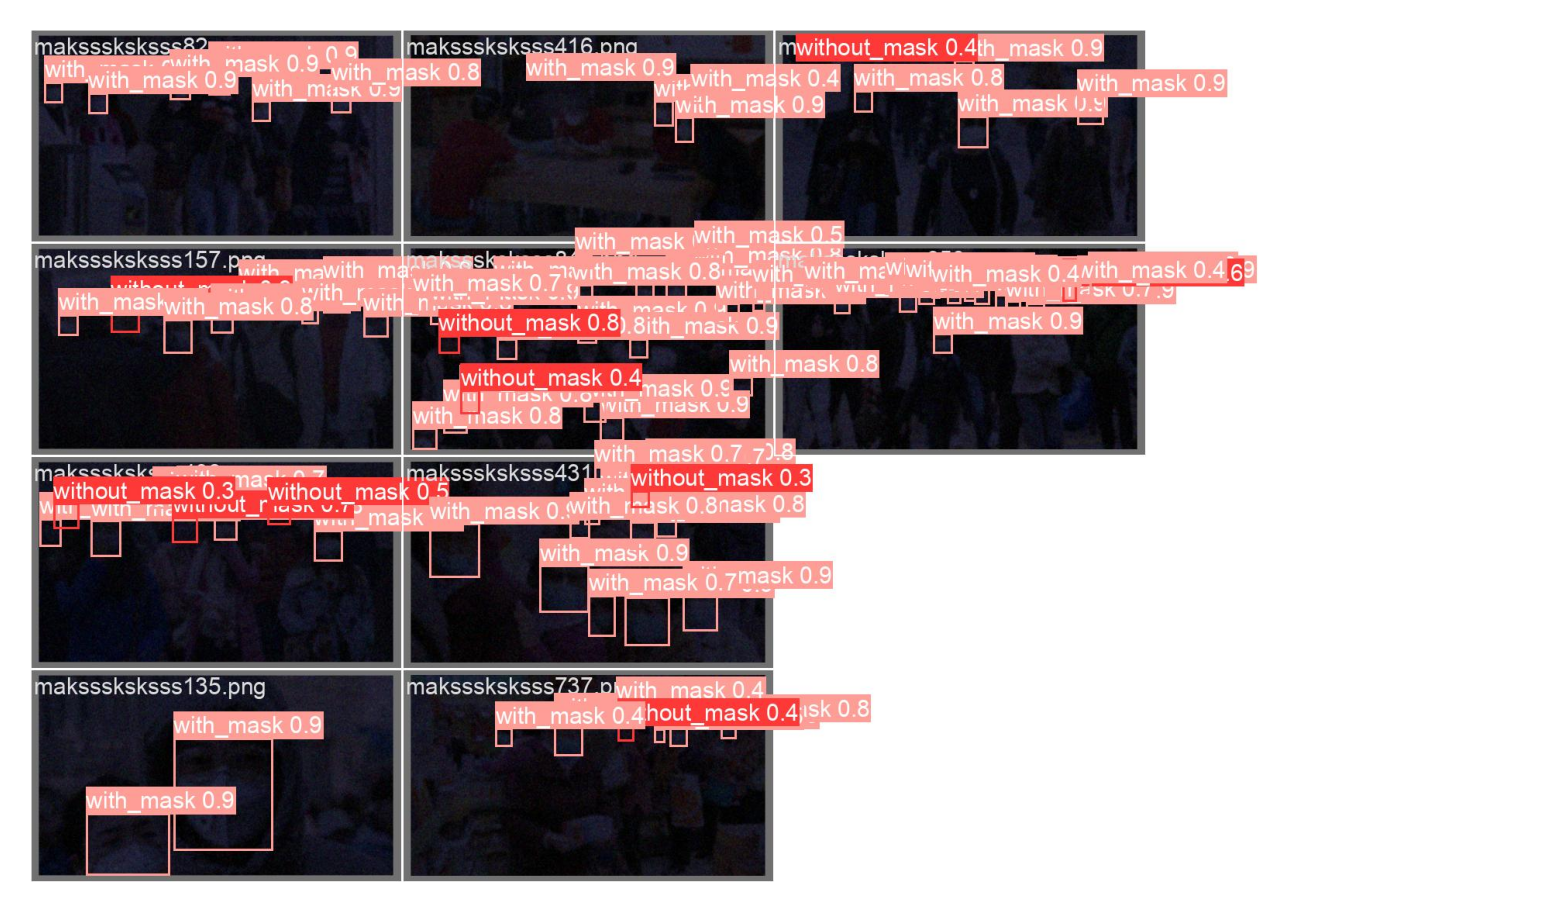

In [42]:
# Ergebnisse der Vorhersagen
image_path = '../results/yolov5/dark_val_batch1_pred.jpg'
plot_high_resolution_png(image_path, dpi=300)

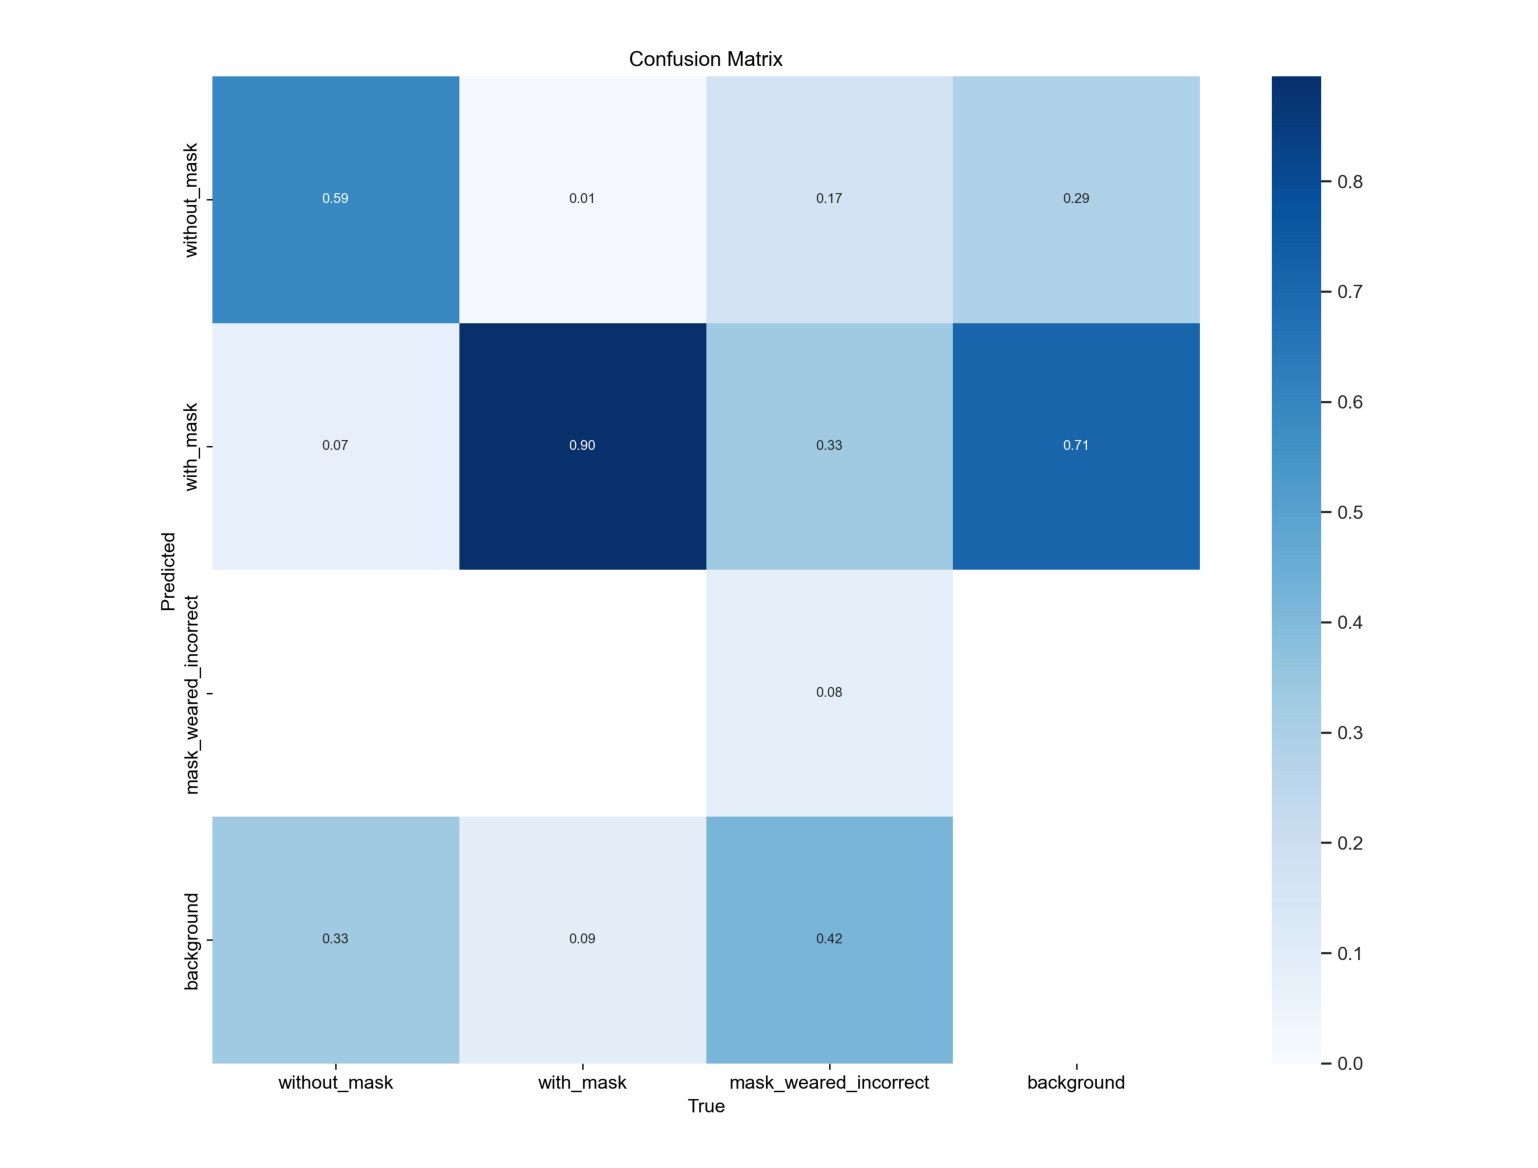

In [43]:
# Konfusionsmatrix
image_path = '../results/yolov5/dark_confusion_matrix.png'
plot_high_resolution_png(image_path, dpi=300)

#### Fazit
nteressant ist die Beobachtung, dass ab Epoche 32 ein sprunghafter Wechsel zwischen Recall und Precision aufgetreten ist. Die Precision ist gesunken, während der Recall gestiegen ist. Dieses Phänomen könnte auf den Einsatz des verdunkelten Datensatzes mit Augmentation zurückzuführen sein. Es ist möglich, dass der Datensatz durch die Verdunkelung bereits so stark abgedunkelt wurde, dass die Klassen "face_with_mask" und "face_without_mask" sich dem dunklen Hintergrund ähneln.

Dies wird durch die Analyse der Konfusionsmatrix weiter unterstützt. Es scheint, dass das Modell Personen zu 0.71 "with_mask" zuweist, obwohl es sich um den "background" handelt. Gleichzeitig werden Personen ohne Maske mit 0.33 auch fälschlicherweise als "background" klassifiziert.

Diese Beobachtungen deuten darauf hin, dass die Verdunkelung möglicherweise zu einer Vermischung der Klassen mit dem Hintergrund geführt hat, was zu einer Verschlechterung der Precision und einer Verbesserung des Recall führt.

#### Einzel-Person Training


In [ ]:
!python one_person.py --data dataset/one_person/data.yaml --epochs 35 --cfg yolov5s.yaml --weights yolov5s.pt --batch-size 5 --upload_dataset --bbox_interval 1 --img 640

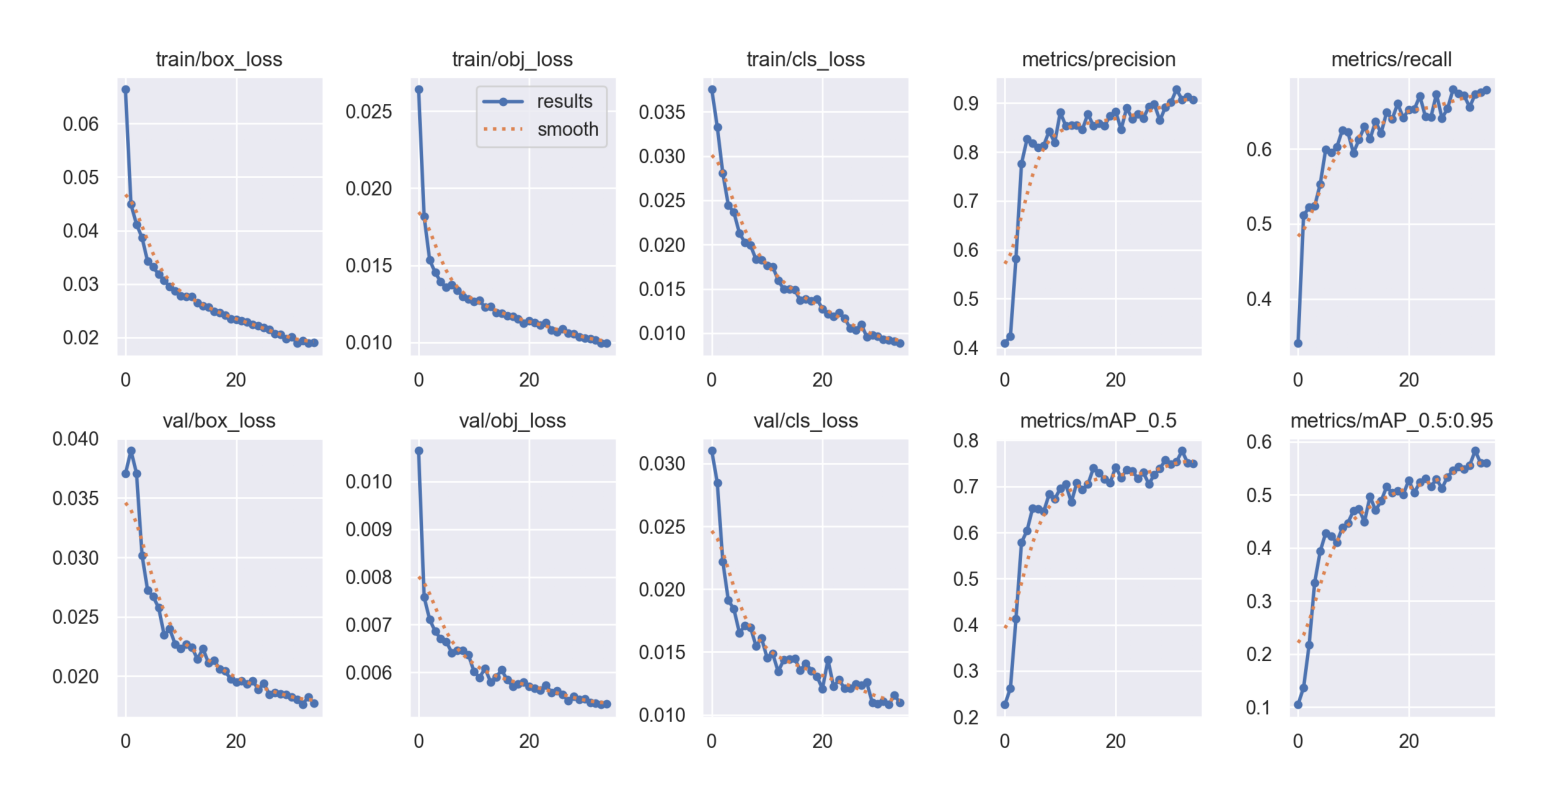

In [44]:
# Ergebnisse der Metriken
image_path = '../results/yolov5/person_results.png'
plot_high_resolution_png(image_path, dpi=300)

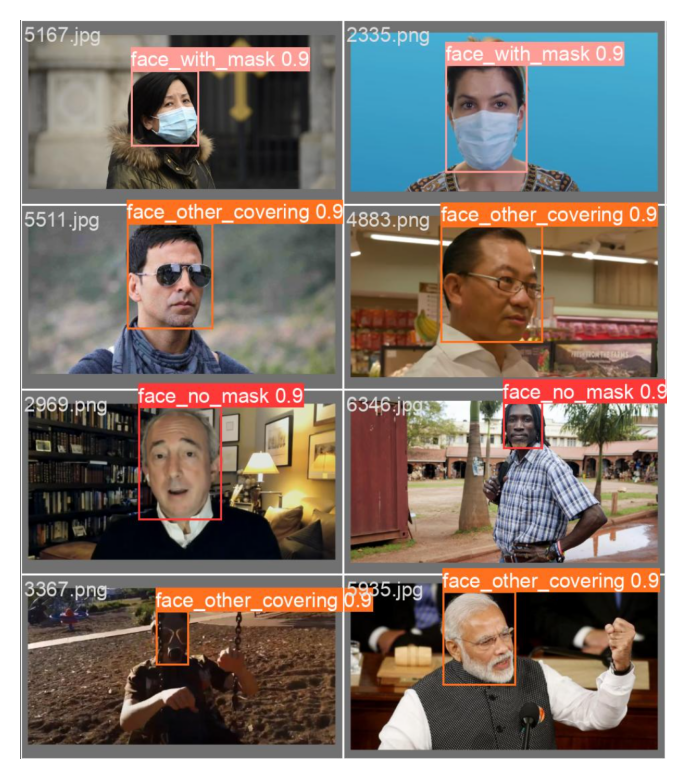

In [45]:
# Ergebnisse der Vorhersagen
image_path = '../results/yolov5/person_label.png'
plot_high_resolution_png(image_path, dpi=200)

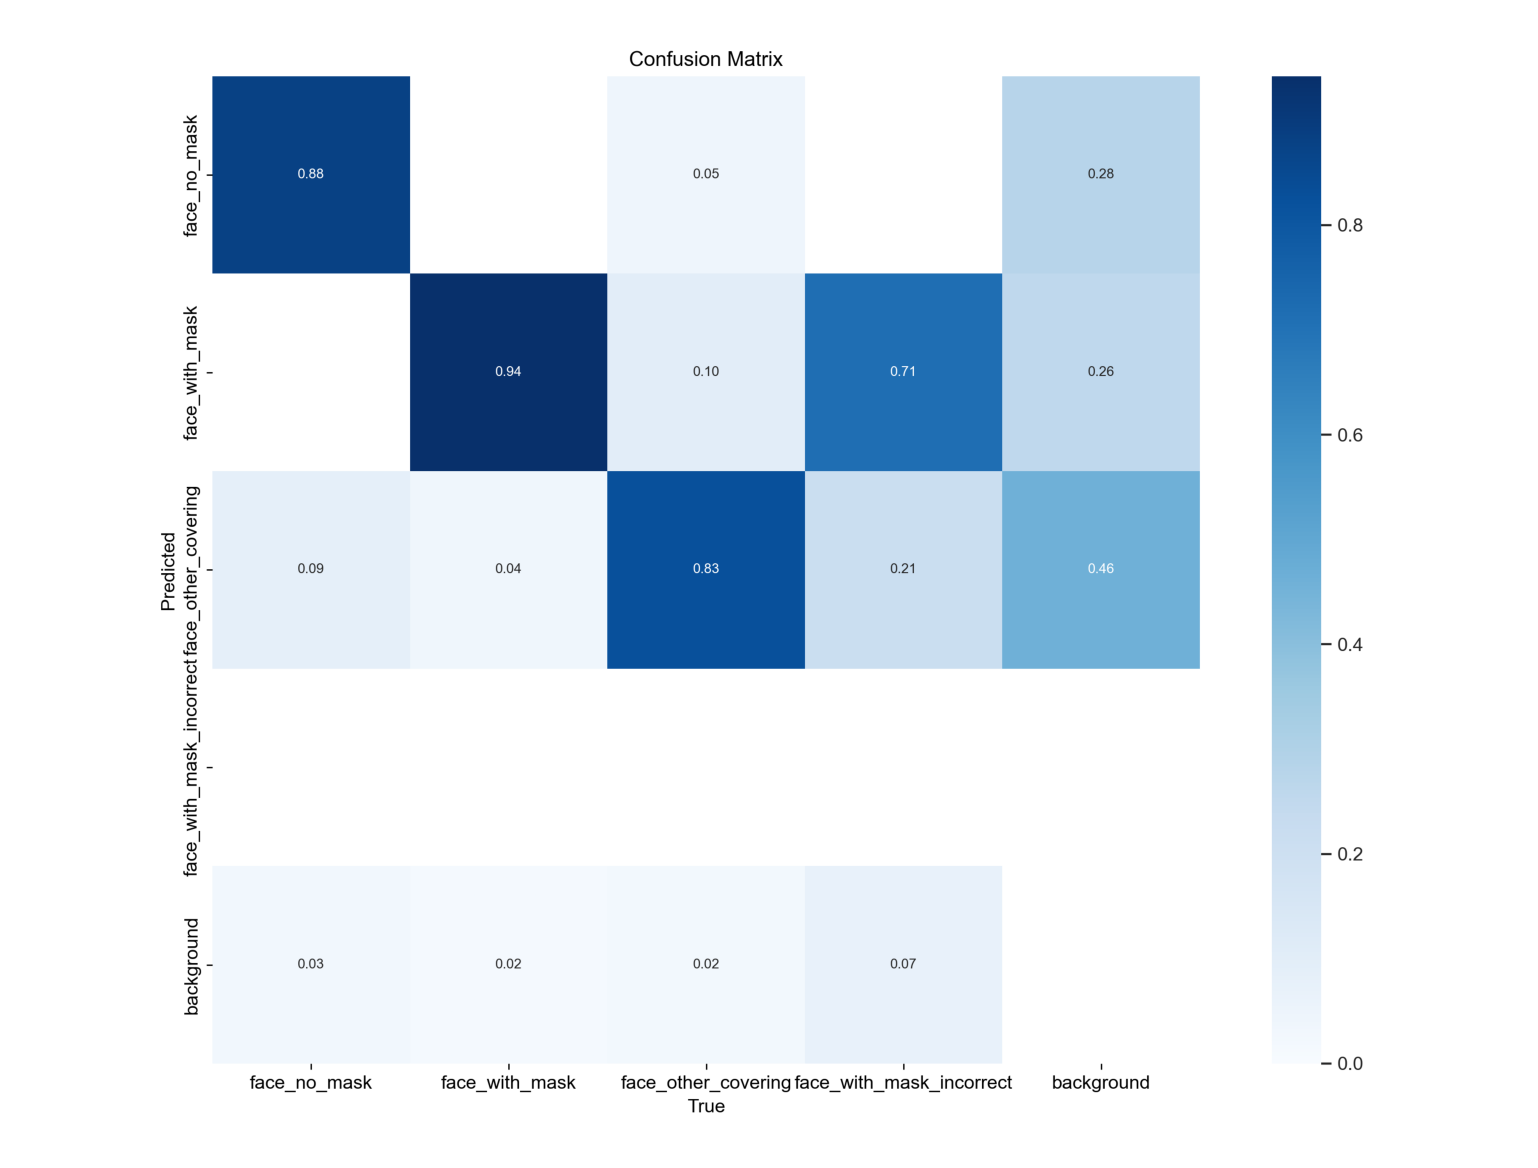

In [46]:
# Konfusionsmatrix
image_path = '../results/yolov5/person_confusion_matrix.png'
plot_high_resolution_png(image_path, dpi=300)

#### Fazit:
Der Datensatz, der nur auf den 4 Face_Classes trainiert wurde und dabei nur einzelne Gesichter betrachtet hat, zeigt deutlich das beste Trainingsergebnis unter allen YOLOv5-Modellen. Diese herausragende Leistung lässt sich wahrscheinlich darauf zurückführen, dass das Modell sich ausschließlich auf diese 4 Klassen fokussiert, die das Erkennen einzelner Gesichter beinhalten. Dadurch wird die Aufgabe vereinfacht, da es keine Überlappungen mit anderen Klassen gibt und das Modell speziell auf die Merkmale und Eigenschaften dieser Gesichtsklassen trainiert wird.

# YOLOv4 Training
Wird genauso trainiert wie YOLOv5.
- All_Classes
- Face_Classes
- Dunkler Datensatz
- Einzel-Personen

In [ ]:
wandb.login()

In [52]:
%cd ..
%cd yolov4

c:\Users\Saniye\Documents\GitHub\Deep-Vision-sta\YOLO
c:\Users\Saniye\Documents\GitHub\Deep-Vision-sta\YOLO\yolov4


In [49]:
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup complete. Using torch 1.9.0 _CudaDeviceProperties(name='NVIDIA GeForce RTX 3080', major=8, minor=6, total_memory=10239MB, multi_processor_count=68)


#### Training von All_Classes

In [ ]:
!python train_all.py --img 640 --batch 3 --epochs 100 --data ../yolov5/dataset/all_classes/data.yaml --weights '' --cfg yolov4-pacsp-s-mish.cfg --hyp data/hyp.scratch.s.yaml

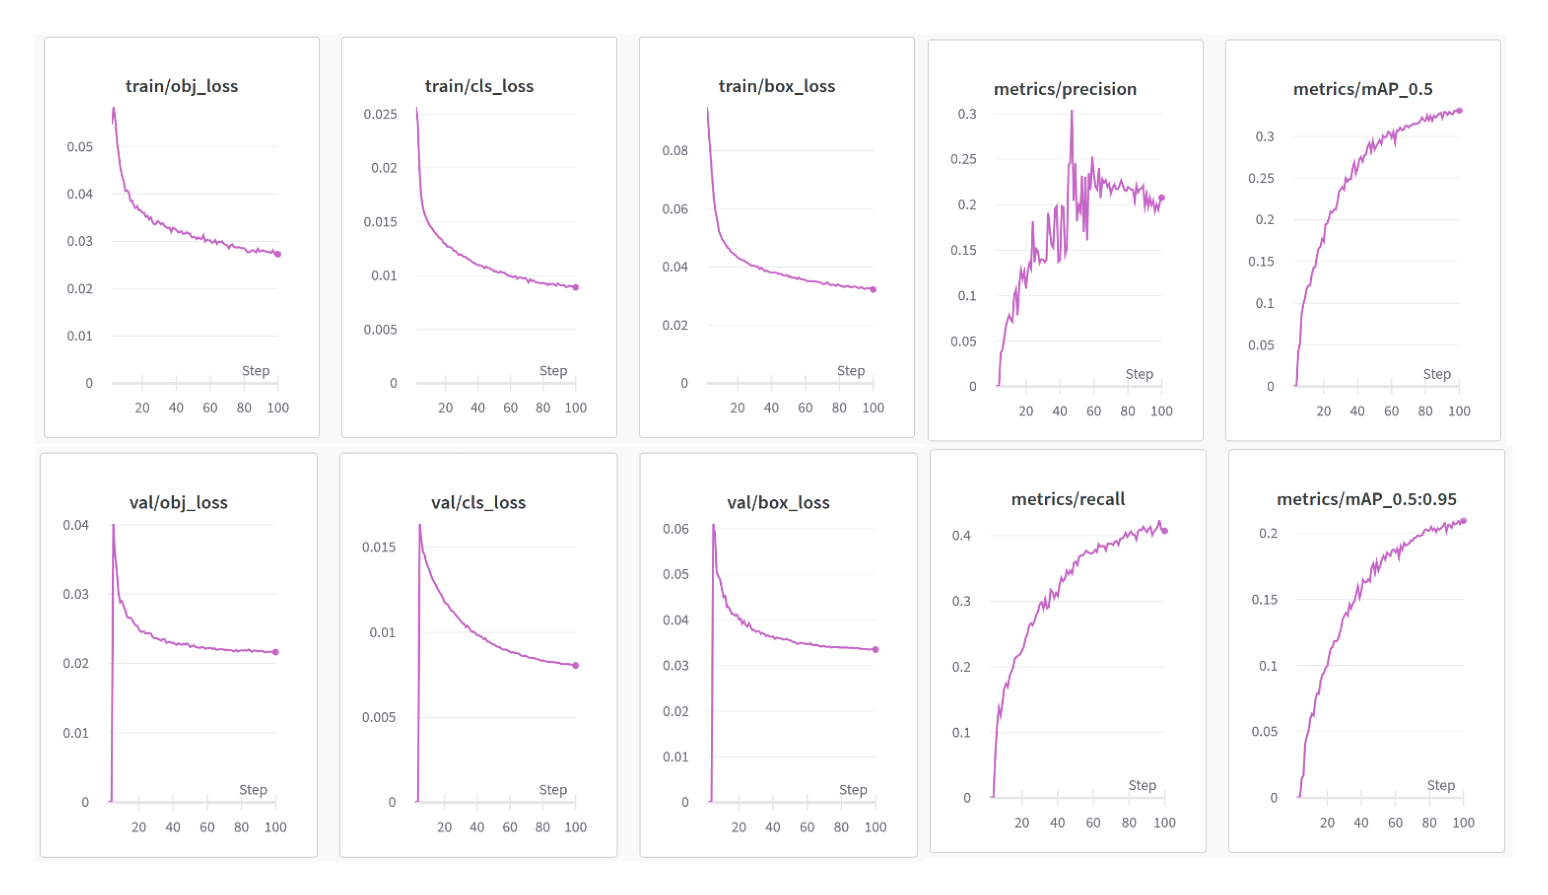

In [54]:
# Ergebnisse der Metriken
image_path = '../results/yolov4/all_result.png'
plot_high_resolution_png(image_path, dpi=300)

Face_Klass training

In [ ]:
!python train_face.py --img 640 --batch 3 --epochs 100 --data ../yolov5/dataset/face_classes/data.yaml --weights '' --cfg yolov4-pacsp-s-mish.cfg --hyp data/hyp.scratch.s.yaml

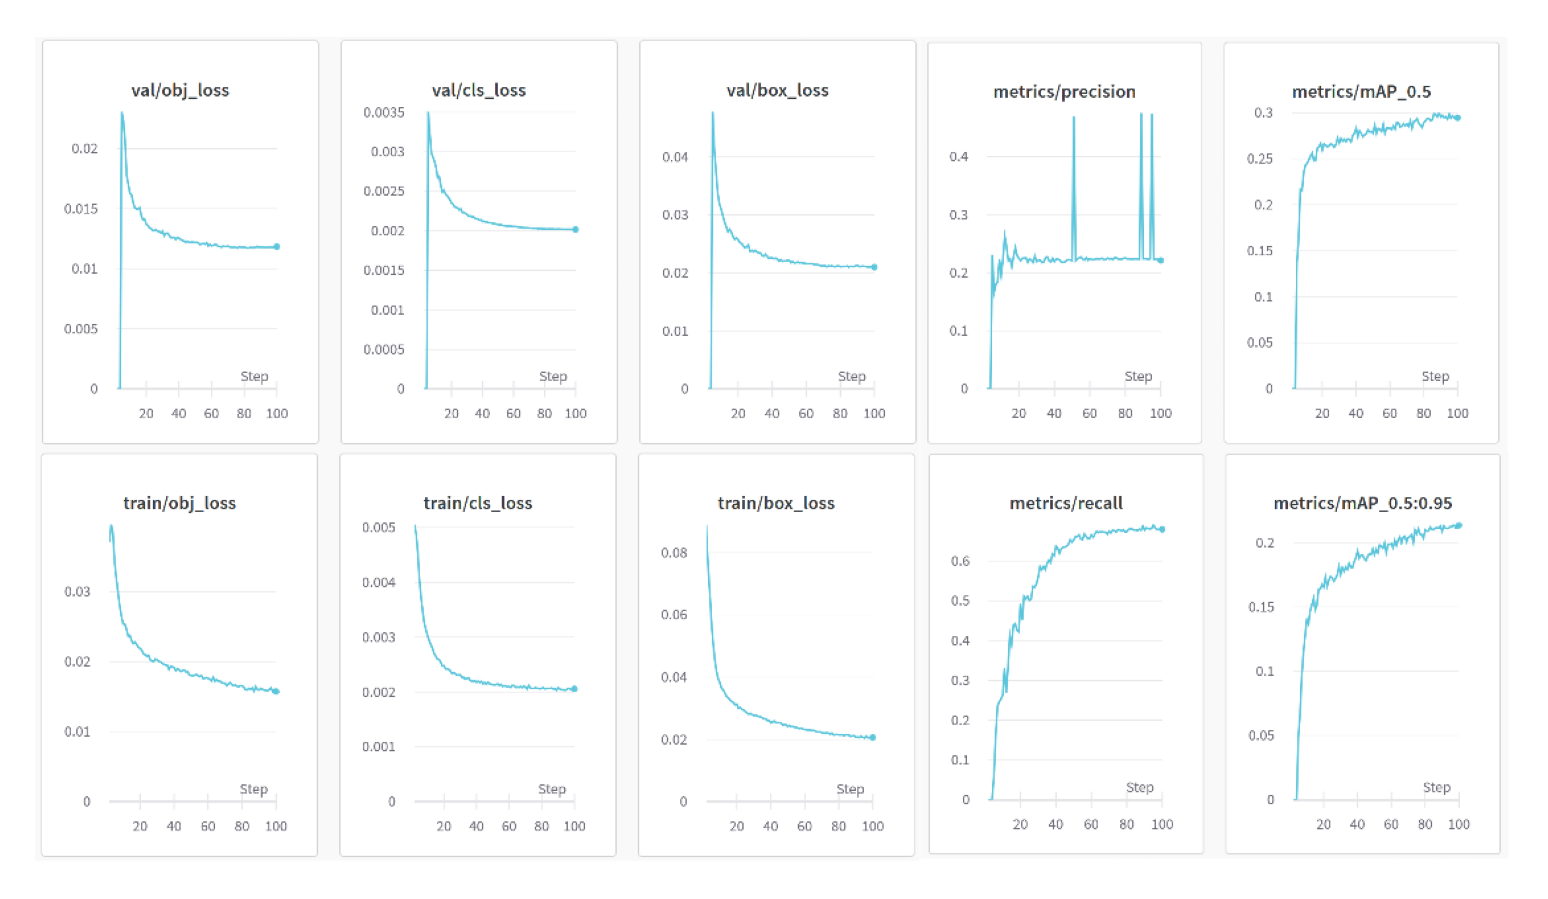

In [56]:
# Ergebnisse der Metriken
image_path = '../results/yolov4/face_result.png'
plot_high_resolution_png(image_path, dpi=300)

#### Fazit
Das Training mit YOLOv4 zeigt im Vergleich zu YOLOv5 tatsächlich schlechtere Ergebnisse. Eine interessante Beobachtung ist jedoch, dass das Training mit YOLOv4 unter Verwendung aller Klassen deutlich besser ist als mit nur den 4 Klassen. Dies könnte darauf hinweisen, dass YOLOv4 aufgrund seiner zusätzlichen Parameter und Schichten besser in der Lage ist, mit einer größeren Anzahl von Klassen umzugehen und die komplexen Zusammenhänge zwischen den verschiedenen Objektklassen zu erlernen. Es ist möglich, dass die erhöhte Kapazität von YOLOv4 es ermöglicht, die Merkmale und Variationen in den Daten besser zu erfassen, was zu einer verbesserten Leistung führt.

Dark Datensatz

In [ ]:
!python train_dark.py --img 640 --batch 3 --epochs 2 --data ../yolov5/dataset/face_classes/data.yaml --weights '' --cfg yolov4-pacsp-s-mish.cfg --hyp data/hyp.scratch.s.yaml

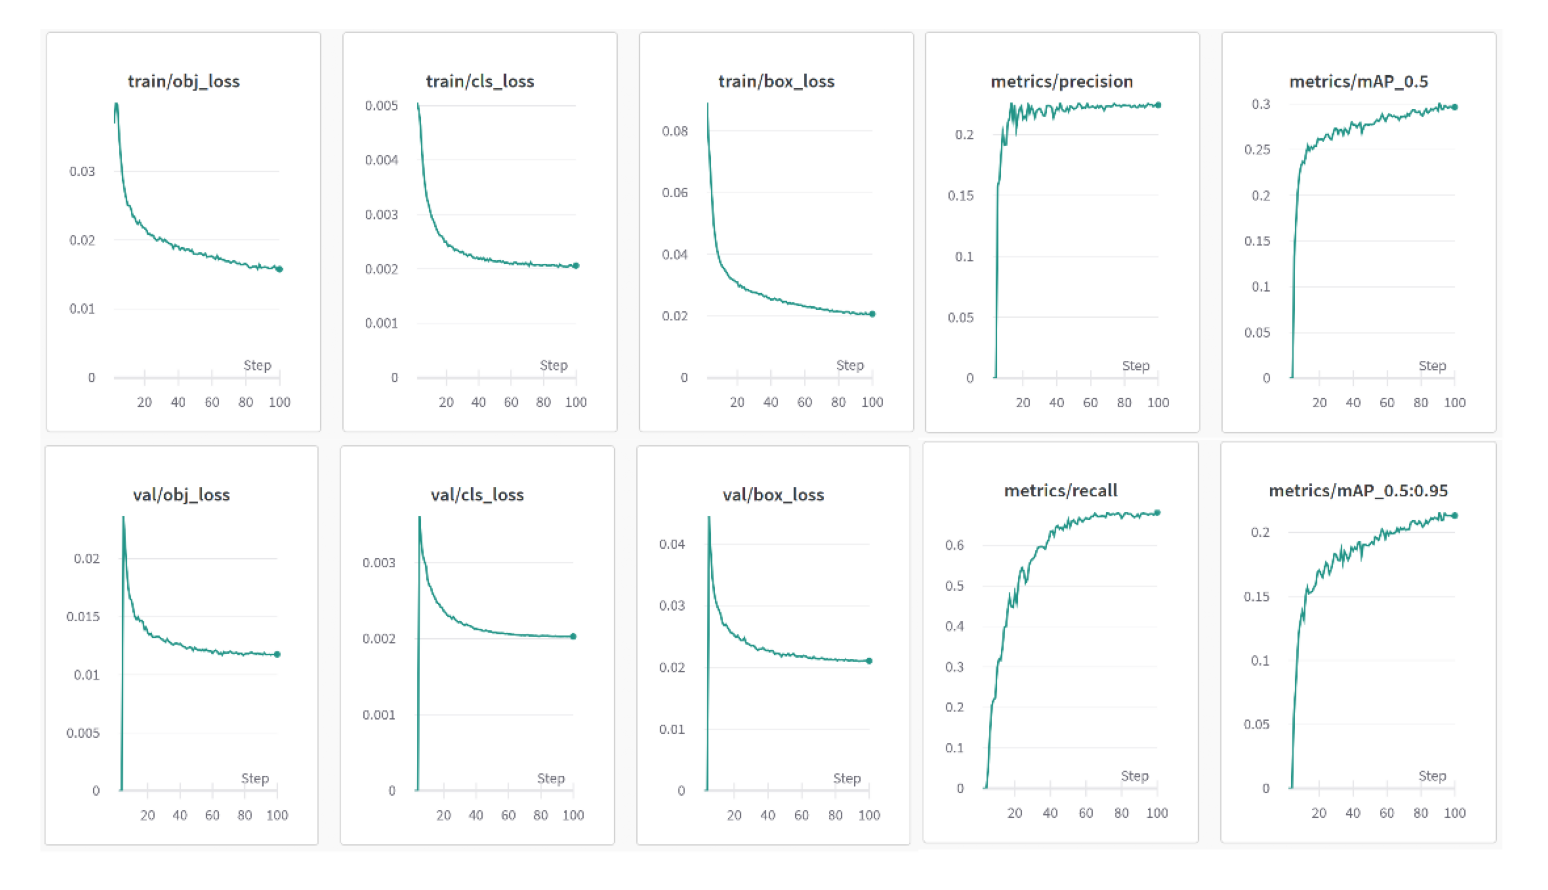

In [57]:
# Ergebnisse der Metriken
image_path = '../results/yolov4/dark_result.png'
plot_high_resolution_png(image_path, dpi=300)

#### Fazit
Die Ergebnisse sind auch hier im Gegensatz zu YOLOv5 deutlich schlechter. Die einzige Ausnahme ist der Recall-Wert, der um 10% besser ist als beim YOLOv5-Modell. Eine mögliche Erklärung dafür könnte sein, dass YOLOv4 mit dem dunklen Datensatz in der Lage ist, komplexere Merkmale besser zu erfassen und somit eine bessere Erkennung der gewünschten Objekte ermöglicht. 

#### One Person Training


In [ ]:
!python train_person.py --img 640 --batch 3 --epochs 100 --data ../yolov5/dataset/face_classes/data.yaml --weights '' --cfg yolov4-pacsp-s-mish.cfg --hyp data/hyp.scratch.s.yaml

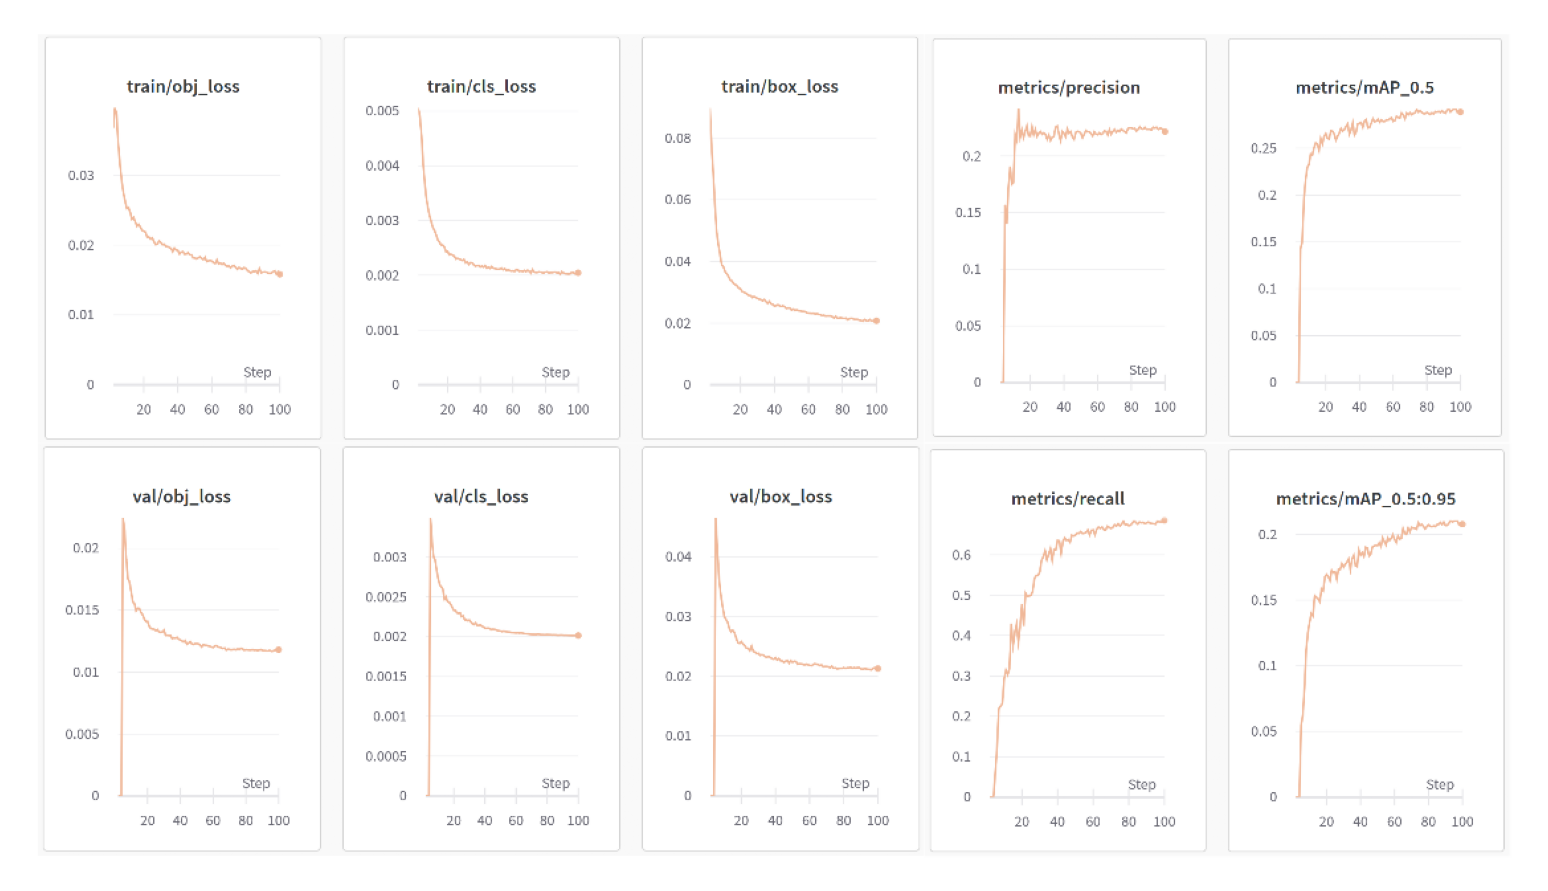

In [58]:
# Ergebnisse der Metriken
image_path = '../results/yolov4/person_result.png'
plot_high_resolution_png(image_path, dpi=300)

#### Fazit
Es ist interessant zu sehen, dass dieses Training ähnliche Werte wie das trainierte YOLOv5-Modell aufweist. Allerdings fällt auf, dass die Precision bei YOLOv4 vergleichsweise niedrig ist, während andere Metriken ähnliche Ergebnisse zeigen. 